<a href="https://colab.research.google.com/github/NganTran-0017/LING5412/blob/main/LING_Final_Project_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import matplotlib.pyplot as plt


In [85]:
# Func load_dict loads the dictionary contents extracted from the text file to a given variable name (stored in varname str)
# Output is a global dict variable 
# Input format:
## varname: a string of variable name
## dictvar: a dict containing the dictionary contents extracted from the text file
def load_dict(varname, dictvar):
  exec('%s = {}' %(varname), globals() )
  for key, value in dictvar.items():
    #print(key,":", value)
    exec('%s[%s] = %s' % (varname, "'"+key+"'", value), globals())


# Func localFile extract the contents of each dictionary variables and load them into a dictionary
# Output: All the dictionaries from the text file will be loaded to the program
#  Input format: a text file containing multiple dictionaries, where each dict has this format:
## KM_test = {'fpr': array([0.        , 0.86136255, 1.        ]), 'tpr': array([0.        , 0.49007655, 1.        ]), 'auc': 0.31435699935689737}
## This function reads in each line, process the string and load it as a dict variable
## In the end, this function loads global variables based on each line of text
def load_dict_from_text (localFile):
  with open(localFile) as infile_object : 
    lines = infile_object.read().splitlines()    # Open and read each line
    measures = {}                                # stores elements of a dict
    model_names = []                             # stores model names
  for line in lines: 
    #print('Line:', line)
    words = line.strip("\n ").split('=')     # remove whitespace and split str to get var name. words[0] contains var name, words[1] contains the phrase that goes after '='
    
    values = words[1].strip("{}").split(': ') # remove the whitespace and '{}', then split the second part of words to get each element in dict
    #print('values:', values)

    # Parse from accuracy to the end of str
    for i in range(3, len(values)):
      #print(i, ':', values[i])
      v = values[i].split(', ')

      if len(v) < 2: measures["macro-F1"] = v[0]
      else:
        if v[1].strip(" '") == 'accuracy': 
          measures[ "auc" ] = v[0]
          
        elif v[1].strip(" '") == 'macro-F1':
          measures["accuracy"] = v[0]
            
    #print('measures:', measures)
    # Parse after the word 'fpr' to 'auc'
    for i in range(1,3):
      v = values[i].strip('array(').split('), ')    

      if v[1].strip(" '") == 'tpr': 
        measures[ "fpr" ] = v[0]
        
      elif v[1].strip(" '") == 'auc':
        measures[ "tpr" ] = v[0]

    #print('measures:', measures)
    load_dict(words[0], measures)
    model_names.append(words[0])
  return model_names

# This function graph multiple ROC curves of given models in rocs dictionary
def graph_multi_ROC (rocs):
  # Set color for each model
  colors = {'LGBM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
            'XGB': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
            'BERT': 'darkred', 'GPT': 'blue'}
  # Set marker for each model          
  markers = {'LGBM':'1--','LR': 'v--', 'SVM': '^--', 'XGB': '*--', 'DT': 'o--', 'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--'}
  
  plt.figure(figsize=(9,6))
  for model in rocs:
    plt.plot( rocs[model]['fpr'], rocs[model]['tpr'], markers[model], color=colors[model], label= model+' - AUC=' + str(round(rocs[model]['auc'], 3)) ) 
  
  plt.plot([0,1], [0,1], 'k--', label='Random Chances')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.02])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  plt.legend(loc='lower right') 
  plt.title( 'ROC Curves of all models')
  plt.show()


In [86]:
### Add file name of model performances HERE
filename = ['ML_rocs.txt','BERT_SMOTE.txt']

# Load performance in text file into dictionary variables, where each of them contains its performance measures
model_names = []
for file in filename:
  model_names.append(load_dict_from_text(file))

# join list of lists into a 1D list
model_names = sum(model_names, [])

# Combine multiple dictionaries into 1 big one
rocs = {}
for m in model_names:
  rocs[m] = globals()[m]

rocs

{'BERT': {'accuracy': 0.9105367793240556,
  'auc': 0.6565983740970027,
  'fpr': [0.0, 0.0307186, 1.0],
  'macro-F1': 0.6854447860753556,
  'tpr': [0.0, 0.34391534, 1.0]},
 'DT': {'accuracy': 0.7882703777335984,
  'auc': 0.5843847138416529,
  'fpr': [0.0, 0.16456391, 1.0],
  'macro-F1': 0.5527825085153276,
  'tpr': [0.0, 0.33333333, 1.0]},
 'KNN': {'accuracy': 0.3290258449304175,
  'auc': 0.6083901470626649,
  'fpr': [0.0, 0.73560066, 1.0],
  'macro-F1': 0.31356047855160807,
  'tpr': [0.0, 0.95238095, 1.0]},
 'LGBM': {'accuracy': 0.8871769383697813,
  'auc': 0.6484499937599224,
  'fpr': [0.0, 0.05759737, 1.0],
  'macro-F1': 0.654610036881505,
  'tpr': [0.0, 0.35449735, 1.0]},
 'LR': {'accuracy': 0.794234592445328,
  'auc': 0.7678894316305177,
  'fpr': [0.0, 0.19967087, 1.0],
  'macro-F1': 0.6387422020831454,
  'tpr': [0.0, 0.73544974, 1.0]},
 'NB': {'accuracy': 0.7301192842942346,
  'auc': 0.6115754889753793,
  'fpr': [0.0, 0.24245749, 1.0],
  'macro-F1': 0.5402439511929285,
  'tpr': [0

# **Compare models in terms of ROC curves**

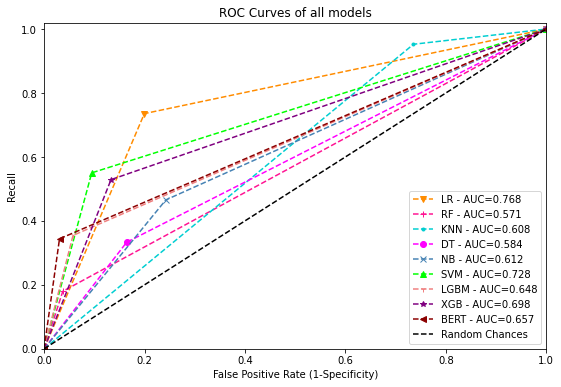

In [87]:
graph_multi_ROC(rocs)

# **Compare models in terms of accuracies**

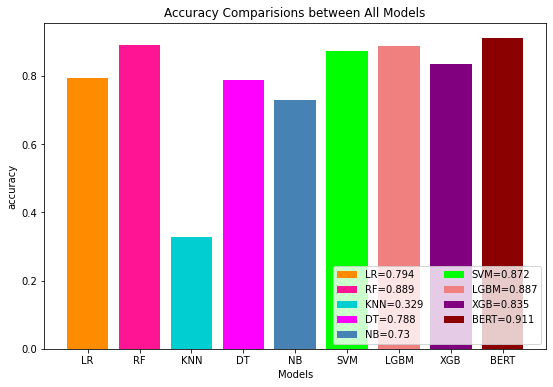

In [88]:
def plot_accuracy_bars (rocs, metric):
  
  # Set color for each model
  colors = {'LGBM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
            'XGB': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
            'BERT': 'darkred', 'GPT': 'blue'}
  # Set marker for each model          
  markers = {'LGBM':'1--','LR': 'v--', 'SVM': '^--', 'XGB': '*--', 'DT': 'o--', 'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--'}
  
  plt.figure(figsize=(9,6))
  for model in rocs.keys():
    plt.bar( model,rocs[model][metric], color=colors[model], label= model + '=' + str(round(rocs[model][metric], 3)) ) 
  

 # plt.xlim([0.0,1.0])
 # plt.ylim([0.0,1.02])
  plt.ylabel(metric)
  plt.xlabel('Models')
  plt.legend(loc='lower right', ncol = 2) 
  title = 'Accuracy' if metric =='accuracy' else 'Macro-F1'
  plt.title( title +' Comparisions between All Models')
  plt.show()

plot_accuracy_bars(rocs, 'accuracy')

# **Compare models in terms of macro-F1 scores**

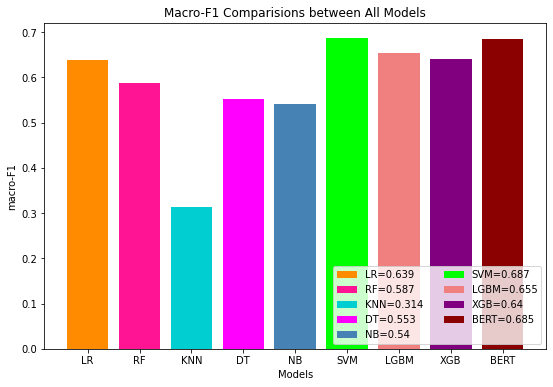

In [89]:
plot_accuracy_bars(rocs, 'macro-F1')